### Imports

In [134]:
import pandas as pd
import numpy as np
import time
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import inflect
from lda_model import simple_cleaner
from nltk.stem import WordNetLemmatizer
import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stop_words.update(['non','also'])
from sklearn.feature_extraction.text import CountVectorizer
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True) 
# from bertopic import BERTopic
import scipy.stats as stats
from scipy.stats import norm
from sklearn.decomposition import TruncatedSVD
from collections import Counter
import re
from textblob import TextBlob


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\trevor.sauerbrey\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\trevor.sauerbrey\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\trevor.sauerbrey\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Data Ingestion

In [209]:
%%time
df1a = pd.read_csv('arxiv_datasets/cs.AI_1.csv') # Artificial Intelligence 1
df1b = pd.read_csv('arxiv_datasets/cs.AI_2.csv') # Artificial Intelligence 2
df2 = pd.read_csv('arxiv_datasets/cs.CC.csv') # Computing and Computation
df3 = pd.read_csv('arxiv_datasets/cs.CE.csv') # Computational Engineering, Finance, and Science
df4 = pd.read_csv('arxiv_datasets/cs.CG.csv') # Computational Geometry
df5 = pd.read_csv('arxiv_datasets/cs.CL.csv') # Computation and Language
df6a = pd.read_csv('arxiv_datasets/cs.CV_1.csv') # Computer Vision and Pattern Recognition 1
df6b = pd.read_csv('arxiv_datasets/cs.CV_2.csv') # Computer Vision and Pattern Recognition 2
df7 = pd.read_csv('arxiv_datasets/cs.CY.csv') # Cybernetics
df8 = pd.read_csv('arxiv_datasets/cs.DB.csv') # Databases
df9 = pd.read_csv('arxiv_datasets/cs.DC.csv') # Distributed, Parallel, and Cluster Computing
df10 = pd.read_csv('arxiv_datasets/cs.DL.csv') # Machine Learning
df11 = pd.read_csv('arxiv_datasets/cs.DS.csv') # Data Structures and Algorithms
df12 = pd.read_csv('arxiv_datasets/cs.ET.csv') # Emerging Technologies
df13 = pd.read_csv('arxiv_datasets/cs.FL.csv') # Formal Languages and Automata Theory
df14 = pd.read_csv('arxiv_datasets/cs.GL.csv') # General Literature
df15 = pd.read_csv('arxiv_datasets/cs.GR.csv') # Graphics
df16 = pd.read_csv('arxiv_datasets/cs.GT.csv') # Computer Science and Game Theory
df17 = pd.read_csv('arxiv_datasets/cs.AR.csv') # Hardware Architecture
df18 = pd.read_csv('arxiv_datasets/cs.HC.csv') # Human-Computer Interaction
df19 = pd.read_csv('arxiv_datasets/cs.IR.csv') # Information Retrieval
df20 = pd.read_csv('arxiv_datasets/cs.IT.csv') # Information Theory
df21 = pd.read_csv('arxiv_datasets/cs.LO.csv') # Logic in Computer Science
df22a = pd.read_csv('arxiv_datasets/cs.LG_1.csv') # Learning 1
df22b = pd.read_csv('arxiv_datasets/cs.LG_2.csv') # Learning 2
df22c = pd.read_csv('arxiv_datasets/cs.LG_3.csv') # Learning 3
df23 = pd.read_csv('arxiv_datasets/cs.MA.csv') # Mathematical Aspects
df24 = pd.read_csv('arxiv_datasets/cs.MS.csv') # Multimedia
df25 = pd.read_csv('arxiv_datasets/cs.NI.csv') # Networking and Internet Architecture
df26 = pd.read_csv('arxiv_datasets/cs.NE.csv') # Neural and Evolutionary Computing
df27 = pd.read_csv('arxiv_datasets/cs.NA.csv') # Numerical Analysis
df28 = pd.read_csv('arxiv_datasets/cs.OS.csv') # Operating Systems
df29 = pd.read_csv('arxiv_datasets/cs.PF.csv') # Performance
df30 = pd.read_csv('arxiv_datasets/cs.PL.csv') # Programming Languages
df31 = pd.read_csv('arxiv_datasets/cs.RO.csv') # Robotics
df32 = pd.read_csv('arxiv_datasets/cs.SI.csv') # Social and Information Networks
df33 = pd.read_csv('arxiv_datasets/cs.SD.csv') # Sound
df34 = pd.read_csv('arxiv_datasets/cs.SE.csv') # Software Engineering
df35 = pd.read_csv('arxiv_datasets/cs.SC.csv') # Symbolic Computation
df36 = pd.read_csv('arxiv_datasets/cs.SY.csv') # Systems and Control
df37 = pd.read_csv('arxiv_datasets/cs.CR.csv') # Cryptography and Security
df38 = pd.read_csv('arxiv_datasets/cs.DM.csv') # Discrete Mathematics

# Concatenating multiple DataFrames into one DataFrame
# The naming convention suggests that 'df1a' and 'df1b' represent different parts of the same category, 'cs.AI'
# Similarly, 'df22a', 'df22b', and 'df22c' represent different parts of the category 'cs.LG'
# These parts are split due to file size limitations
df = pd.concat([
    df1a, df1b, df2, df3, df4, df5, df6a, df6b, df7, df8, df9, df10,
    df11, df12, df13, df14, df15, df16, df17, df18, df19, df20,
    df21, df22a, df22b, df22c, df23, df24, df25, df26, df27, df28, df29, df30,
    df31, df32, df33, df34, df35, df36, df37, df38
]).reset_index(drop=True)
df.head()

CPU times: total: 14.5 s
Wall time: 14.5 s


,Title,ID,Published,Updated,Summary,Author,Comments,Journal_Ref,Link,Primary_Category,Categories,DOI,License,Affiliation,Unnamed: 0
0,Domain-Independent Dynamic Programming,http://arxiv.org/abs/2401.13883v1,2024-01-25T01:48:09Z,2024-01-25T01:48:09Z,"For combinatorial optimization problems, mod...","['\nRyo Kuroiwa\n', '\nJ. Christopher Beck\n']",Manuscript submitted to JACM,NaN,http://arxiv.org/abs/2401.13883v1,cs.AI,['cs.AI'],NaN,NaN,[],NaN
1,Agent-based Simulation with Netlogo to Evaluat...,http://arxiv.org/abs/2401.14153v1,2024-01-25T13:05:06Z,2024-01-25T13:05:06Z,In this paper an agent-based simulation is d...,"['\nJ. Carbo\n', '\nN. Sanchez\n', '\nJ. M. Mo...",NaN,NaN,http://dx.doi.org/10.1057/jos.2016.10,cs.AI,['cs.AI'],10.1057/jos.2016.10,NaN,[],NaN
2,Automated legal reasoning with discretion to a...,http://arxiv.org/abs/2401.14511v1,2024-01-25T21:11:08Z,2024-01-25T21:11:08Z,Automated legal reasoning and its applicatio...,"['\nJoaquín Arias\n', '\nMar Moreno-Rebato\n',...",NaN,Artificial Intelligence and Law (2023),http://dx.doi.org/10.1007/s10506-023-09376-5,cs.AI,"['cs.AI', 'I.2.1']",10.1007/s10506-023-09376-5,NaN,[],NaN
3,Efficient Constraint Generation for Stochastic...,http://arxiv.org/abs/2401.14636v1,2024-01-26T04:00:07Z,2024-01-26T04:00:07Z,Current methods for solving Stochastic Short...,"['\nJohannes Schmalz\n', '\nFelipe Trevizan\n']",Extended version of AAAI 2024 paper,NaN,http://arxiv.org/abs/2401.14636v1,cs.AI,['cs.AI'],NaN,NaN,[],NaN
4,Synthetic Multimodal Dataset for Empowering Sa...,http://arxiv.org/abs/2401.14743v1,2024-01-26T10:05:41Z,2024-01-26T10:05:41Z,This paper presents a synthetic multimodal d...,"['\nTakanori Ugai\n', '\nShusaku Egami\n', '\n...","7 pages, 2 figures,4 tables",NaN,http://arxiv.org/abs/2401.14743v1,cs.AI,['cs.AI'],NaN,NaN,[],NaN


### Data Pre-processing

In [205]:
%%time

# Remove duplicate rows and reset the index
df = df.drop_duplicates().reset_index(drop=True)

# Selecting specific columns from the DataFrame
df = df[['Title', 'Published', 'Summary']]

# Assess the size of the dataset
print(df.shape)

# Initialize WordNet Lemmatizer
wnl = WordNetLemmatizer()

# Load English stopwords
stop_words = set(stopwords.words('english'))

def simple_cleaner(my_string):
    """
    Clean the input text by removing punctuation, numbers, converting to lowercase,
    lemmatizing words, and removing stopwords.
    
    Parameters:
        my_string (str): Input string to be cleaned.
        
    Returns:
        str: Cleaned text.
    """
    # Remove punctuation and numbers using regex
    my_string = re.sub(r'[^\w\s]', '', my_string)  # Remove punctuation
    my_string = re.sub(r'\d+', '', my_string)       # Remove numbers
    
    # Lowercase the text, split into words, lemmatize, and remove stopwords
    my_string = [wnl.lemmatize(w) for w in my_string.lower().split() if w not in stop_words]
    
    # Join the lemmatized words back into a string
    return " ".join(my_string)

def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text.lower())

    # Remove punctuation
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]

    # Define custom stopwords
    custom_stopwords = ['ab', 'abboud']

    # Combine NLTK stopwords with custom stopwords
    stop_words = set(stopwords.words('english') + custom_stopwords)

    # Remove stopwords
    words = [w for w in stripped if not w in stop_words]

    # # Lemmatization
    # lemmatizer = WordNetLemmatizer()
    # words = [lemmatizer.lemmatize(w) for w in words]

    return ' '.join(words)

# Applying the 'simple_cleaner' function to the 'Summary' column and storing the result in a new column 'cleaned_text'
df['cleaned_text'] = df['Summary'].apply(simple_cleaner)

# Initialize the inflect engine
p = inflect.engine()

# Example text
my_text = "Hello world or worlds this is a test or tests to check functionality functionalities"

# Function to convert plural nouns to singular nouns
def singular_maker(text):
    return " ".join([p.singular_noun(word) or word for word in text])

# Example of using the 'singular_maker' function
singular_maker(my_text.split())

# Check if 'datasets' is a singular noun
p.singular_noun('datasets')

# Convert 'Published' column to datetime
df['pub_date'] = pd.to_datetime(df['Published']).dt.date

# Group by publication date and concatenate strings
date_df = pd.DataFrame(df.groupby('pub_date')['cleaned_text'].sum()).reset_index()

# Apply 'singular_maker' function to the concatenated text
date_df['cleaned_text'] = date_df['cleaned_text'].str.split().apply(singular_maker)

# Count the number of papers per day
date_df['number_of_papers'] = [num for num in df.groupby('pub_date')['cleaned_text'].count()]

# Count number of tokens per day
date_df['number_of_tokens'] = date_df['cleaned_text'].str.split().apply(len)

# Count number of unique tokens per day
date_df['unique_tokens'] = date_df['cleaned_text'].str.split().apply(set).apply(len)

# Print total tokens in the dataset
print(f"Total tokens in dataset: {date_df['cleaned_text'].apply(len).sum()}")

date_df.head(3)

(9968, 3)
Total tokens in dataset: 8616096
CPU times: total: 1min 16s
Wall time: 1min 16s


,pub_date,cleaned_text,number_of_papers,number_of_tokens,unique_tokens
0,2012-09-13,theory random real number exceedingly welldeve...,1,43,41
1,2012-09-17,model stochastic game multiple controller join...,1,95,57
2,2012-09-18,show equality language two nonperiodic binary ...,1,25,20


In [107]:
# Save and read in the DataFrame to a CSV file for quicker access
# date_df.to_csv("processed_df.csv", index=False)

date_df = pd.read_csv('processed_df.csv')
date_df.head()

,Unnamed: 0,pub_date,cleaned_text,number_of_papers,number_of_tokens,unique_tokens
0,0,2012-09-12,backpropagation algorithm one widely used popu...,18,1688,941
1,1,2012-09-13,theory random real number exceedingly welldeve...,12,1175,648
2,2,2012-09-14,automatic text summarization preprocessing imp...,31,2898,1350
3,3,2012-09-15,several variant constraint satisfaction proble...,18,1494,821
4,4,2012-09-16,present framework largescale distributed escie...,10,933,589


In [210]:
# Random sample of 100 rows
sample_df = df.sample(n=10000, random_state=42)  # You can specify any random state for reproducibility
sample_df

,Title,ID,Published,Updated,Summary,Author,Comments,Journal_Ref,Link,Primary_Category,Categories,DOI,License,Affiliation,Unnamed: 0
145319,Improving CLIP Training with Language Rewrites,http://arxiv.org/abs/2305.20088v2,2023-05-31T17:59:04Z,2023-10-28T08:46:13Z,Contrastive Language-Image Pre-training (CLI...,"['\nLijie Fan\n', '\nDilip Krishnan\n', '\nPhi...",NeurIPS 2023,NaN,http://arxiv.org/abs/2305.20088v2,cs.CV,"['cs.CV', 'cs.CL', 'cs.LG']",NaN,NaN,[],NaN
523953,Some challenges of calibrating differentiable ...,http://arxiv.org/abs/2307.01085v1,2023-07-03T15:07:10Z,2023-07-03T15:07:10Z,Agent-based models (ABMs) are a promising ap...,"['\nArnau Quera-Bofarull\n', '\nJoel Dyer\n', ...",Accepted at the ICML 2023 Differentiable Almos...,NaN,http://arxiv.org/abs/2307.01085v1,cs.MA,"['cs.MA', 'cs.AI', 'q-fin.TR', 'stat.ML']",NaN,NaN,[],NaN
10378,Building Safe and Reliable AI systems for Safe...,http://arxiv.org/abs/2308.03176v1,2023-08-06T18:05:59Z,2023-08-06T18:05:59Z,Although AI systems have been applied in var...,['\nShuang Ao\n'],4 pages,2023,http://arxiv.org/abs/2308.03176v1,cs.AI,['cs.AI'],NaN,NaN,[],NaN
370564,Set-Theoretic and Type-Theoretic Ordinals Coin...,http://arxiv.org/abs/2301.10696v3,2023-01-25T16:59:23Z,2023-06-12T21:12:33Z,"In constructive set theory, an ordinal is a ...","['\nTom de Jong\n', '\nNicolai Kraus\n', '\nFr...",v2: Minor changes. To appear at LICS'23. v3: A...,38th Annual ACM/IEEE Symposium on Logic in Com...,http://dx.doi.org/10.1109/LICS56636.2023.10175762,cs.LO,"['cs.LO', 'math.LO']",10.1109/LICS56636.2023.10175762,NaN,[],NaN
256472,The Energy Complexity of BFS in Radio Networks,http://arxiv.org/abs/2007.09816v1,2020-07-19T23:26:59Z,2020-07-19T23:26:59Z,We consider a model of energy complexity in ...,"['\nYi-Jun Chang\n', '\nVarsha Dani\n', '\nTho...",To appear in PODC 2020,NaN,http://arxiv.org/abs/2007.09816v1,cs.DS,"['cs.DS', 'cs.DC']",NaN,NaN,[],NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328018,Using Neighborhood Context to Improve Informat...,http://arxiv.org/abs/2108.10395v1,2021-08-23T20:30:48Z,2021-08-23T20:30:48Z,Information Extraction from visual documents...,"['\nKalpa Gunaratna\n', '\nVijay Srinivasan\n'...","accepted at CIKM 2021, pre-print version",NaN,http://dx.doi.org/10.1145/3459637.3482211,cs.LG,"['cs.LG', 'cs.IR']",10.1145/3459637.3482211,NaN,[],NaN
525352,Constructing games on networks for controlling...,http://arxiv.org/abs/2201.10913v1,2022-01-26T13:02:45Z,2022-01-26T13:02:45Z,The inequality in capital or resource distri...,['\nJarosław Adam Miszczak\n'],"13 pages, 4 figures, source code available at\...",Physica A: Statistical Mechanics and its Appli...,http://dx.doi.org/10.1016/j.physa.2022.126997,physics.soc-ph,"['physics.soc-ph', 'cond-mat.stat-mech', 'cs.G...",10.1016/j.physa.2022.126997,NaN,[],NaN
482202,Personalized Activity Recognition with Deep Tr...,http://arxiv.org/abs/2001.05517v1,2020-01-15T19:17:02Z,2020-01-15T19:17:02Z,A significant challenge for a supervised lea...,"['\nDavid M. Burns\n', '\nCari M. Whyne\n']",NaN,NaN,http://arxiv.org/abs/2001.05517v1,stat.ML,"['stat.ML', 'cs.LG', 'I.2.1']",NaN,NaN,[],1699.0
127450,Attention-Based Multimodal Fusion for Video De...,http://arxiv.org/abs/1701.03126v2,2017-01-11T19:16:42Z,2017-03-09T22:57:10Z,Currently successful methods for video descr...,"['\nChiori Hori\n', '\nTakaaki Hori\n', '\nTen...",Resubmitted to the rebuttal for CVPR 2017 for ...,NaN,http://arxiv.org/abs/1701.03126v2,cs.CV,"['cs.CV', 'cs.CL', 'cs.MM']",NaN,NaN,[],NaN


In [211]:
# Re-initialize for less changes of code 
df = sample_df


In [212]:
%%time

b_article_df = df[['Published', 'Summary']].copy()
b_article_df

# Applying the 'simple_cleaner' function to the 'Summary' column and storing the result in a new column 'cleaned_text'
b_article_df['cleaned_text'] = b_article_df['Summary'].apply(preprocess_text)
b_article_df

CPU times: total: 15.8 s
Wall time: 15.8 s


,Published,Summary,cleaned_text
145319,2023-05-31T17:59:04Z,Contrastive Language-Image Pre-training (CLI...,contrastive languageimage pretraining clip s...
523953,2023-07-03T15:07:10Z,Agent-based models (ABMs) are a promising ap...,agentbased models abms promising approach mo...
10378,2023-08-06T18:05:59Z,Although AI systems have been applied in var...,although ai systems applied various fields ach...
370564,2023-01-25T16:59:23Z,"In constructive set theory, an ordinal is a ...",constructive set theory ordinal hereditarily ...
256472,2020-07-19T23:26:59Z,We consider a model of energy complexity in ...,consider model energy complexity radio network...
...,...,...,...
328018,2021-08-23T20:30:48Z,Information Extraction from visual documents...,information extraction visual documents enable...
525352,2022-01-26T13:02:45Z,The inequality in capital or resource distri...,inequality capital resource distribution among...
482202,2020-01-15T19:17:02Z,A significant challenge for a supervised lea...,significant challenge supervised learning appr...
127450,2017-01-11T19:16:42Z,Currently successful methods for video descr...,currently successful methods video description...


In [213]:
def remove_numbers(text):
    # Remove all numbers from the text
    text_without_numbers = re.sub(r'\d+', '', text)
    return text_without_numbers

b_article_df['cleaned_text'] = b_article_df['cleaned_text'].apply(remove_numbers)
b_article_df

,Published,Summary,cleaned_text
145319,2023-05-31T17:59:04Z,Contrastive Language-Image Pre-training (CLI...,contrastive languageimage pretraining clip s...
523953,2023-07-03T15:07:10Z,Agent-based models (ABMs) are a promising ap...,agentbased models abms promising approach mo...
10378,2023-08-06T18:05:59Z,Although AI systems have been applied in var...,although ai systems applied various fields ach...
370564,2023-01-25T16:59:23Z,"In constructive set theory, an ordinal is a ...",constructive set theory ordinal hereditarily ...
256472,2020-07-19T23:26:59Z,We consider a model of energy complexity in ...,consider model energy complexity radio network...
...,...,...,...
328018,2021-08-23T20:30:48Z,Information Extraction from visual documents...,information extraction visual documents enable...
525352,2022-01-26T13:02:45Z,The inequality in capital or resource distri...,inequality capital resource distribution among...
482202,2020-01-15T19:17:02Z,A significant challenge for a supervised lea...,significant challenge supervised learning appr...
127450,2017-01-11T19:16:42Z,Currently successful methods for video descr...,currently successful methods video description...


In [214]:
%%time

# Define helper functions
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

reindexed_data = b_article_df['cleaned_text']
reindexed_data.index = b_article_df['Published']

count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=15,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=reindexed_data)

CPU times: total: 859 ms
Wall time: 857 ms


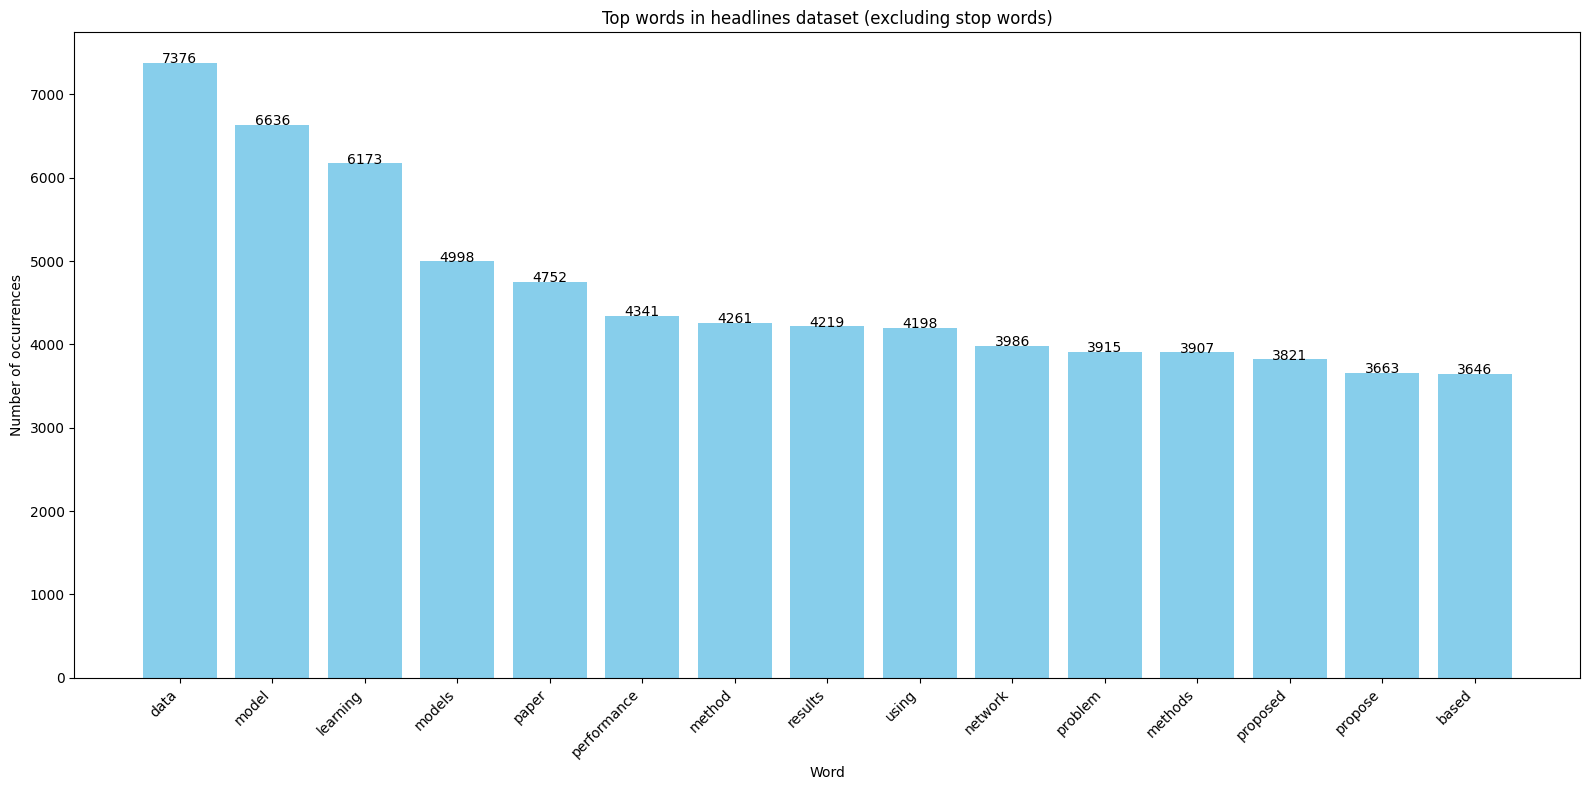

In [215]:
fig, ax = plt.subplots(figsize=(16,8))
bars = ax.bar(range(len(words)), word_values, color='skyblue')

# Adding counts on each bar
for bar, value in zip(bars, word_values):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 5, str(int(value)), 
            ha='center', color='black', fontsize=10)

ax.set_xticks(range(len(words)))
ax.set_xticklabels(words, rotation=45, ha='right') 
ax.set_title('Top words in headlines dataset (excluding stop words)')
ax.set_xlabel('Word')
ax.set_ylabel('Number of occurrences')
plt.tight_layout()  
plt.show()

In [216]:
reindexed_data

Published
2023-05-31T17:59:04Z    contrastive languageimage pretraining  clip  s...
2023-07-03T15:07:10Z    agentbased models  abms  promising approach mo...
2023-08-06T18:05:59Z    although ai systems applied various fields ach...
2023-01-25T16:59:23Z    constructive set theory  ordinal hereditarily ...
2020-07-19T23:26:59Z    consider model energy complexity radio network...
                                              ...                        
2021-08-23T20:30:48Z    information extraction visual documents enable...
2022-01-26T13:02:45Z    inequality capital resource distribution among...
2020-01-15T19:17:02Z    significant challenge supervised learning appr...
2017-01-11T19:16:42Z    currently successful methods video description...
2023-12-04T11:45:55Z    biological cells utilize membranes liquidlike ...
Name: cleaned_text, Length: 10000, dtype: object

In [217]:
%%time

from textblob import TextBlob

# this part takes a while
summaries = [TextBlob(reindexed_data[i]).pos_tags for i in range(reindexed_data.shape[0])]


CPU times: total: 1min 3s
Wall time: 1min 3s


In [218]:
%%time

summaries_df = pd.DataFrame({'tags':summaries})

word_counts = [] 
pos_counts = {}

for headline in summaries_df[u'tags']:
    word_counts.append(len(headline))
    for tag in headline:
        if tag[1] in pos_counts:
            pos_counts[tag[1]] += 1
        else:
            pos_counts[tag[1]] = 1
            
print('Total number of words: ', np.sum(word_counts))
print('Mean number of words per day: ', np.mean(word_counts))

Total number of words:  1046151
Mean number of words per day:  104.6151
CPU times: total: 359 ms
Wall time: 353 ms


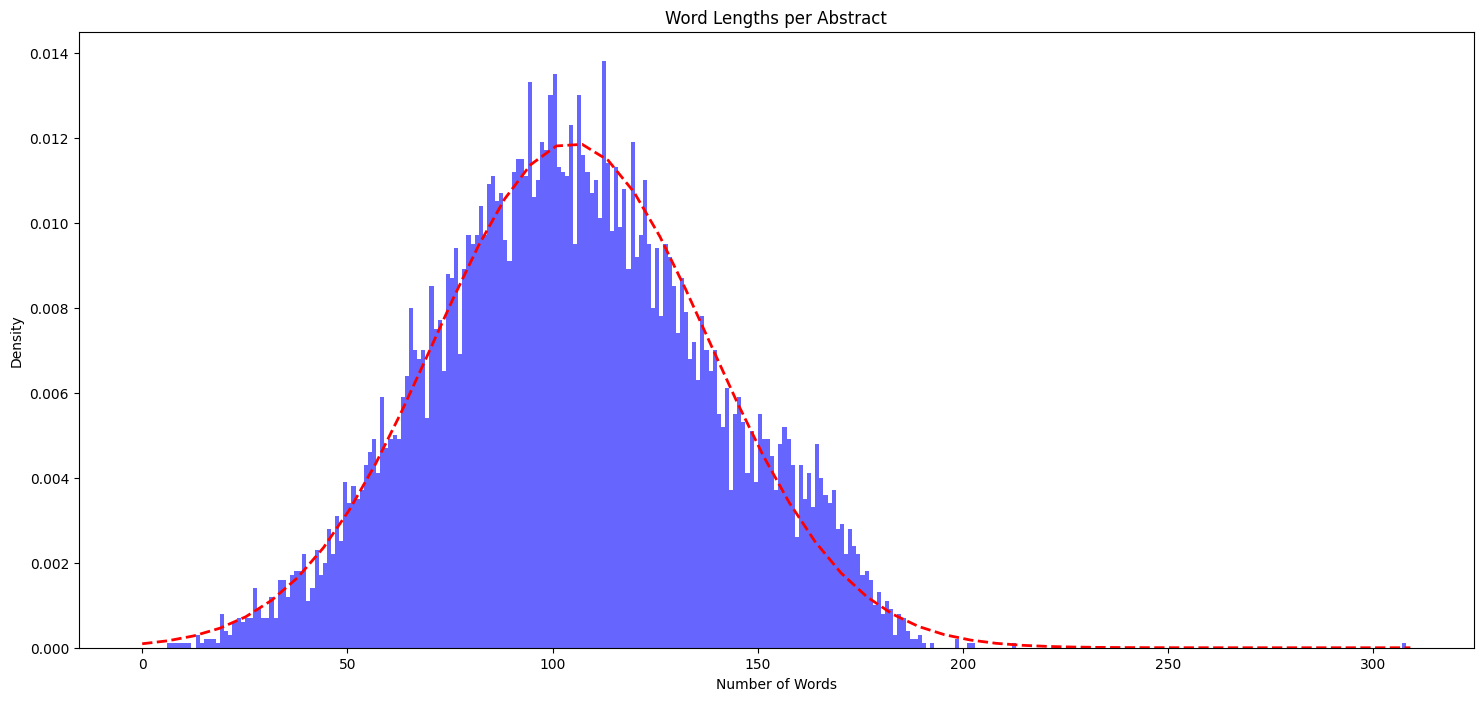

CPU times: total: 500 ms
Wall time: 502 ms


In [219]:
%%time

# Assuming 'word_counts' is already defined
max_word_count = max(word_counts) + 1  # Find the maximum word count and add 1 for the upper range

# Generate evenly spaced numbers over the interval from 0 to max_word_count, for plotting the PDF
x_values = np.linspace(0, max_word_count, 50)

# Calculate the PDF for the normal distribution fit to the data
y = norm.pdf(x_values, np.mean(word_counts), np.std(word_counts))

# Create the plot
fig, ax = plt.subplots(figsize=(18, 8))

# Plot the histogram of word counts
ax.hist(word_counts, bins=range(1, max_word_count), density=True, alpha=0.6, color='b')

# Overlay the PDF
ax.plot(x_values, y, 'r--', linewidth=2)

# Set the title and labels
ax.set_title('Word Lengths per Abstract')
# ax.set_xticks(range(1, max_word_count))
ax.set_xlabel('Number of Words')
ax.set_ylabel('Density')

plt.show()

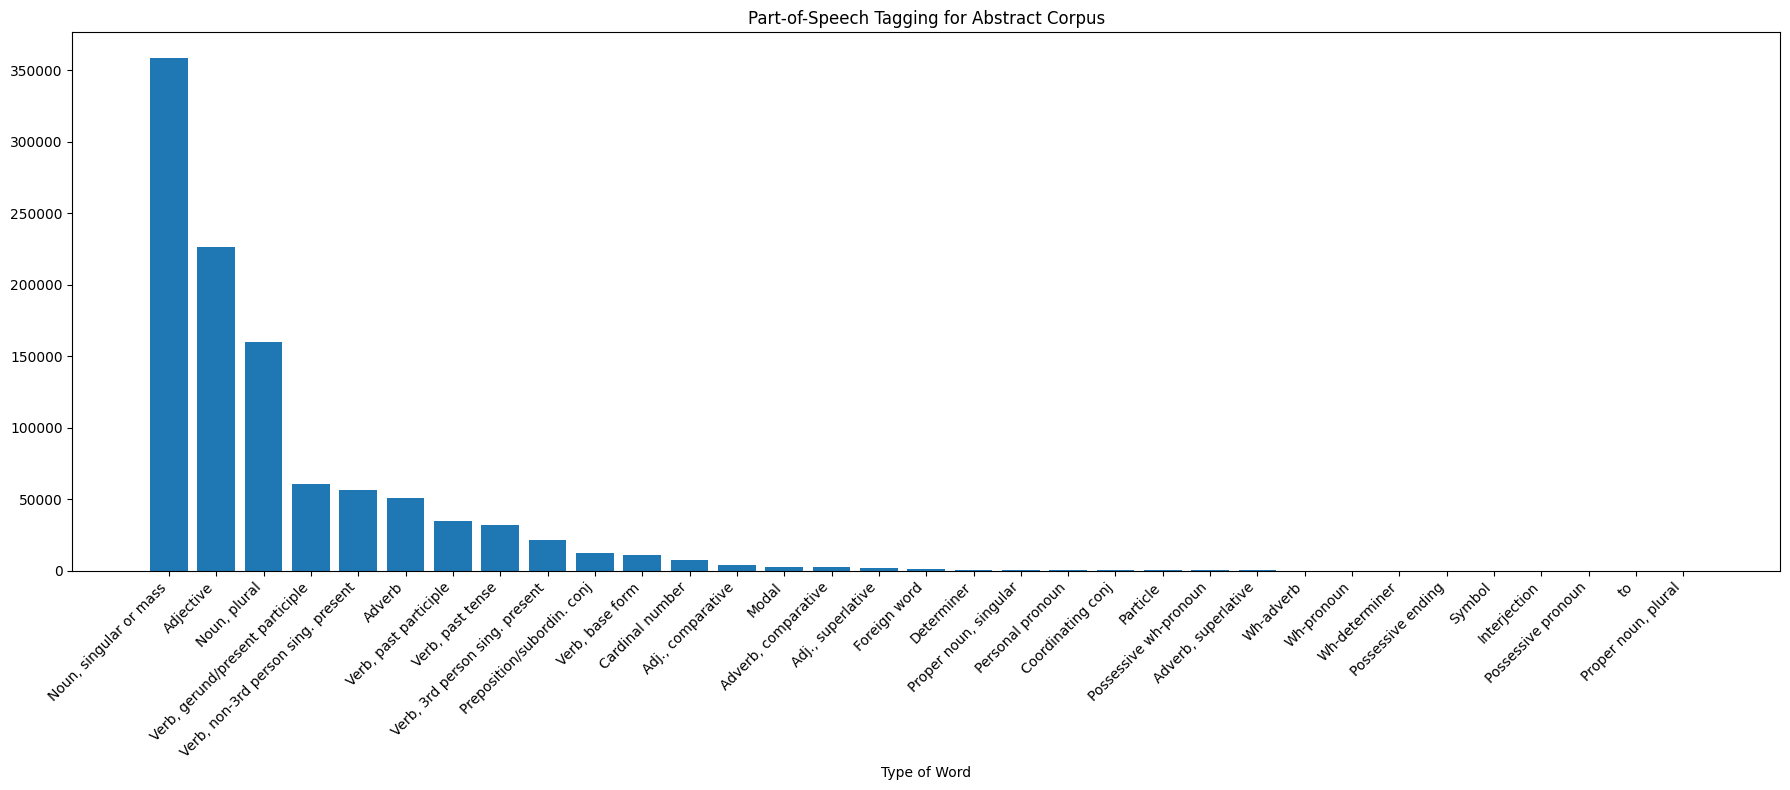

In [220]:
# POS tag descriptions
pos_descriptions = {
    "CC": "Coordinating conj",
    "CD": "Cardinal number",
    "DT": "Determiner",
    "EX": "Existential there",
    "FW": "Foreign word",
    "IN": "Preposition/subordin. conj",
    "JJ": "Adjective",
    "JJR": "Adj., comparative",
    "JJS": "Adj., superlative",
    "LS": "List item marker",
    "MD": "Modal",
    "NN": "Noun, singular or mass",
    "NNS": "Noun, plural",
    "NNP": "Proper noun, singular",
    "NNPS": "Proper noun, plural",
    "PDT": "Predeterminer",
    "POS": "Possessive ending",
    "PRP": "Personal pronoun",
    "PRP$": "Possessive pronoun",
    "RB": "Adverb",
    "RBR": "Adverb, comparative",
    "RBS": "Adverb, superlative",
    "RP": "Particle",
    "SYM": "Symbol",
    "TO": "to",
    "UH": "Interjection",
    "VB": "Verb, base form",
    "VBD": "Verb, past tense",
    "VBG": "Verb, gerund/present participle",
    "VBN": "Verb, past participle",
    "VBP": "Verb, non-3rd person sing. present",
    "VBZ": "Verb, 3rd person sing. present",
    "WDT": "Wh-determiner",
    "WP": "Wh-pronoun",
    "WP$": "Possessive wh-pronoun",
    "WRB": "Wh-adverb"
}

# Sorted types and counts
pos_sorted_types = sorted(pos_counts, key=pos_counts.__getitem__, reverse=True)
pos_sorted_counts = sorted(pos_counts.values(), reverse=True)

# Mapping short POS tags to their descriptions for the x-tick labels
pos_sorted_descriptions = [pos_descriptions.get(tag, "Unknown") for tag in pos_sorted_types]

# Plotting
fig, ax = plt.subplots(figsize=(18, 8))
ax.bar(range(len(pos_counts)), pos_sorted_counts)
ax.set_xticks(range(len(pos_counts)))

# Here, change the rotation to 45 degrees for better readability
ax.set_xticklabels(pos_sorted_descriptions, rotation=45, ha="right")  # ha="right" aligns the text right, making it more legible

ax.set_title('Part-of-Speech Tagging for Abstract Corpus')
ax.set_xlabel('Type of Word')  # This sets the label for the x-axis, not its tick labels

plt.tight_layout()  # Adjust layout to make room for the angled x-tick labels
plt.show()

In [221]:
b_article_df

,Published,Summary,cleaned_text
145319,2023-05-31T17:59:04Z,Contrastive Language-Image Pre-training (CLI...,contrastive languageimage pretraining clip s...
523953,2023-07-03T15:07:10Z,Agent-based models (ABMs) are a promising ap...,agentbased models abms promising approach mo...
10378,2023-08-06T18:05:59Z,Although AI systems have been applied in var...,although ai systems applied various fields ach...
370564,2023-01-25T16:59:23Z,"In constructive set theory, an ordinal is a ...",constructive set theory ordinal hereditarily ...
256472,2020-07-19T23:26:59Z,We consider a model of energy complexity in ...,consider model energy complexity radio network...
...,...,...,...
328018,2021-08-23T20:30:48Z,Information Extraction from visual documents...,information extraction visual documents enable...
525352,2022-01-26T13:02:45Z,The inequality in capital or resource distri...,inequality capital resource distribution among...
482202,2020-01-15T19:17:02Z,A significant challenge for a supervised lea...,significant challenge supervised learning appr...
127450,2017-01-11T19:16:42Z,Currently successful methods for video descr...,currently successful methods video description...


In [222]:
b_article_df['Published'] = b_article_df.index
b_article_df

,Published,Summary,cleaned_text
145319,145319,Contrastive Language-Image Pre-training (CLI...,contrastive languageimage pretraining clip s...
523953,523953,Agent-based models (ABMs) are a promising ap...,agentbased models abms promising approach mo...
10378,10378,Although AI systems have been applied in var...,although ai systems applied various fields ach...
370564,370564,"In constructive set theory, an ordinal is a ...",constructive set theory ordinal hereditarily ...
256472,256472,We consider a model of energy complexity in ...,consider model energy complexity radio network...
...,...,...,...
328018,328018,Information Extraction from visual documents...,information extraction visual documents enable...
525352,525352,The inequality in capital or resource distri...,inequality capital resource distribution among...
482202,482202,A significant challenge for a supervised lea...,significant challenge supervised learning appr...
127450,127450,Currently successful methods for video descr...,currently successful methods video description...


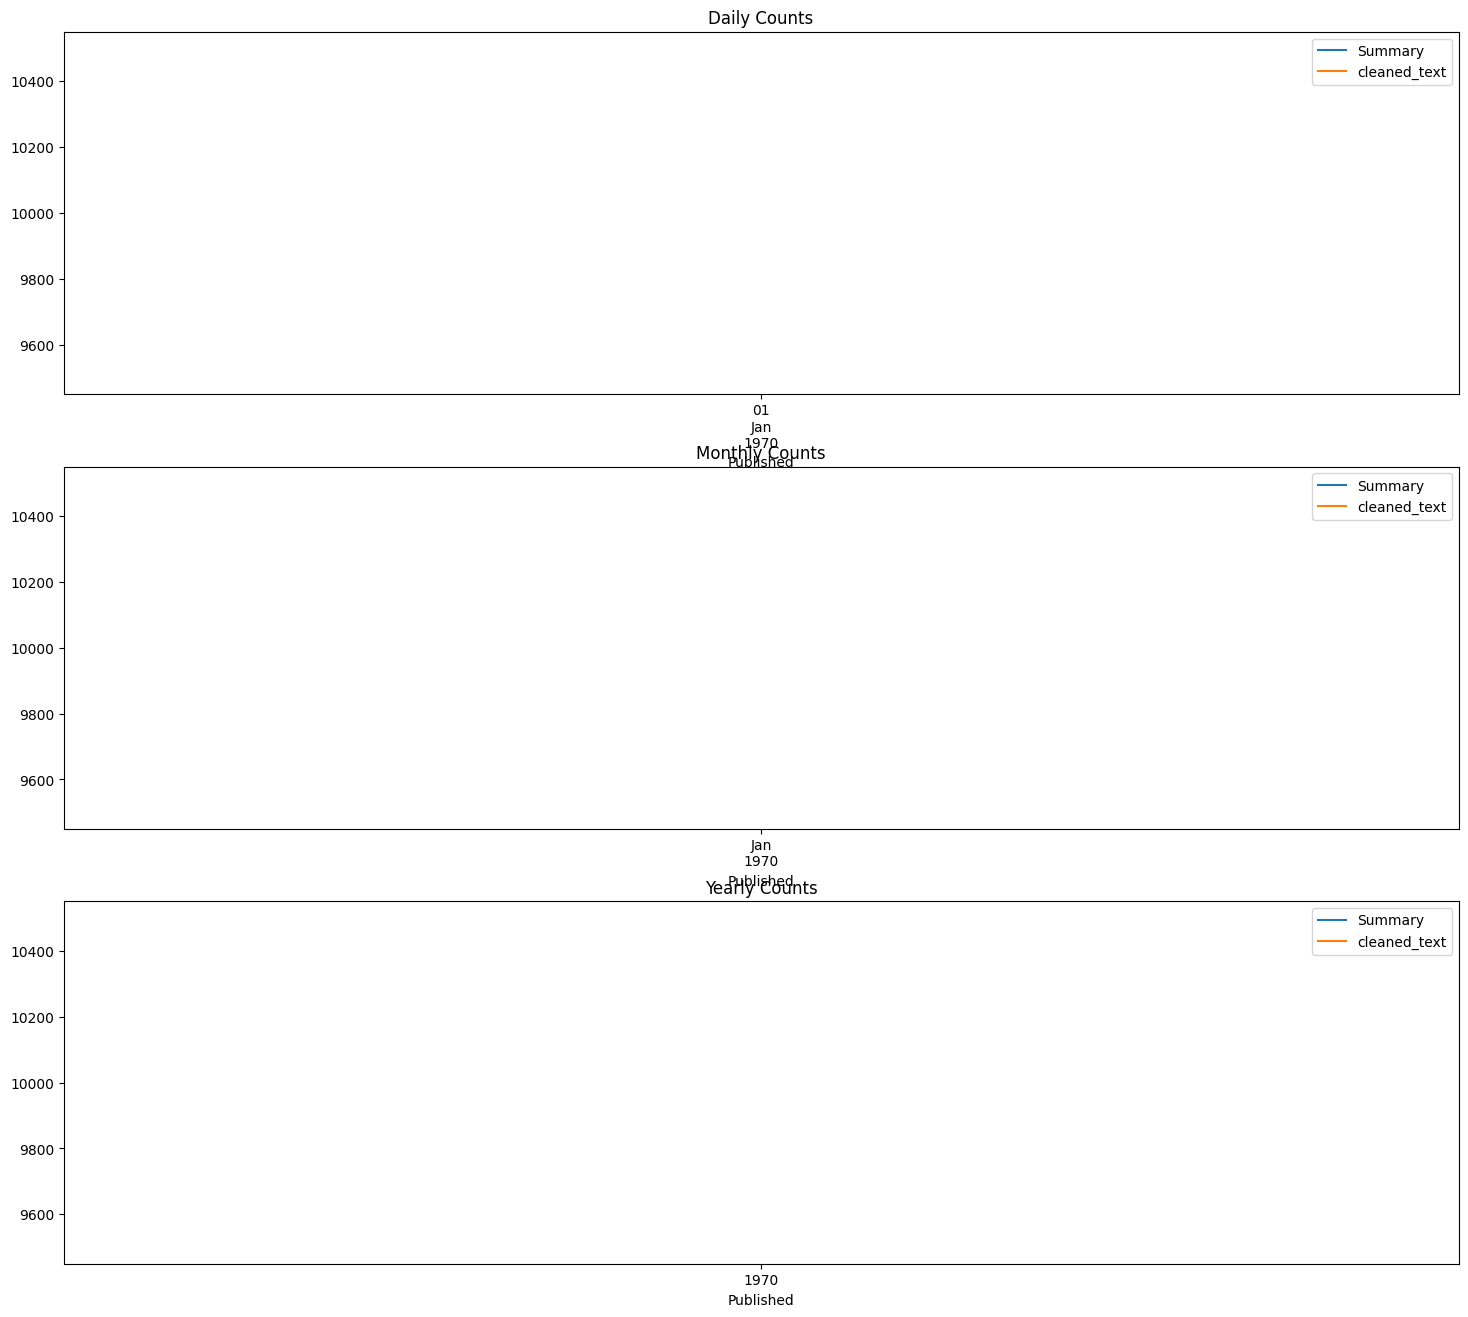

In [223]:
# Convert the 'date' column to datetime type and set it as the index
b_article_df['Published'] = pd.to_datetime(b_article_df['Published'])
b_article_df.set_index('Published', inplace=True)

# Resample the data to get daily, monthly, and yearly counts
daily_counts = b_article_df.resample('D').count()
monthly_counts = b_article_df.resample('M').count()
yearly_counts = b_article_df.resample('A').count()

fig, ax = plt.subplots(3, figsize=(18,16))
daily_counts.plot(ax=ax[0], legend=True);
ax[0].set_title('Daily Counts');
monthly_counts.plot(ax=ax[1], legend=True);
ax[1].set_title('Monthly Counts');
yearly_counts.plot(ax=ax[2], legend=True);
ax[2].set_title('Yearly Counts');
plt.show()

In [224]:
%%time

# Now, let's proceed with vectorization
small_count_vectorizer = CountVectorizer(stop_words='english', max_features=40000)
small_text_sample = reindexed_data.sample(n=100, random_state=0).values

print('Abstract before vectorization: {}'.format(small_text_sample[99]))

small_document_term_matrix = small_count_vectorizer.fit_transform(small_text_sample)

print('Abstract after vectorization: \n{}'.format(small_document_term_matrix[99]))

Abstract before vectorization: chartopolis multifaceted sociotechnical testbed meant aid building connections among engineers  psychologists  anthropologists  ethicists  artists  superficially  urban autonomousvehicle testbed includes physical environment smallscale robotic vehicles well highfidelity virtual replica provides extra flexibility way computer simulation  however  environments developed allow participatory simulation human drivers well  physical vehicle remotely operated human drivers driverseat point view immerses within smallscale testbed  drivers also pilot highfidelity models vehicles virtual replica environment  juxtaposing human driving performance across two contexts help identify extent human driving behaviors sensorimotor responses involve psychological engagement system physical  virtual  side effects consequences  furthermore  collaboration artists  designed physical testbed make tangible reality technological advancement causes history city fork multiple  parall

In [225]:
n_topics = 8


In [226]:
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(small_document_term_matrix)

In [227]:
# Define helper functions
def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic 
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
    '''
    returns a tuple of topic categories and their 
    accompanying magnitudes for a given list of keys
    '''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)

def get_top_n_words(n, keys, document_term_matrix, count_vectorizer):
    '''
    returns a list of n_topic strings, where each string contains the n most common 
    words in a predicted category, in order
    '''
    n_topics = len(np.unique(keys))
    top_word_indices = []
    for topic in range(n_topics):
        temp_vector_sum = np.zeros((1, document_term_matrix.shape[1]))
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        top_n_word_indices = np.argsort(temp_vector_sum)[0][-n:][::-1]
        top_word_indices.append(top_n_word_indices)   
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = count_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))         
    return top_words

In [228]:
# Assuming lsa_keys is intended to hold the topic keys for each document
lsa_keys = get_keys(lsa_topic_matrix)  
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)

In [229]:
top_n_words_lsa = get_top_n_words(10, lsa_keys, small_document_term_matrix, small_count_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

Topic 1:  ability
Topic 2:  ability
Topic 3:  ability
Topic 4:  ability
Topic 5:  ability
Topic 6:  ability
Topic 7:  ability


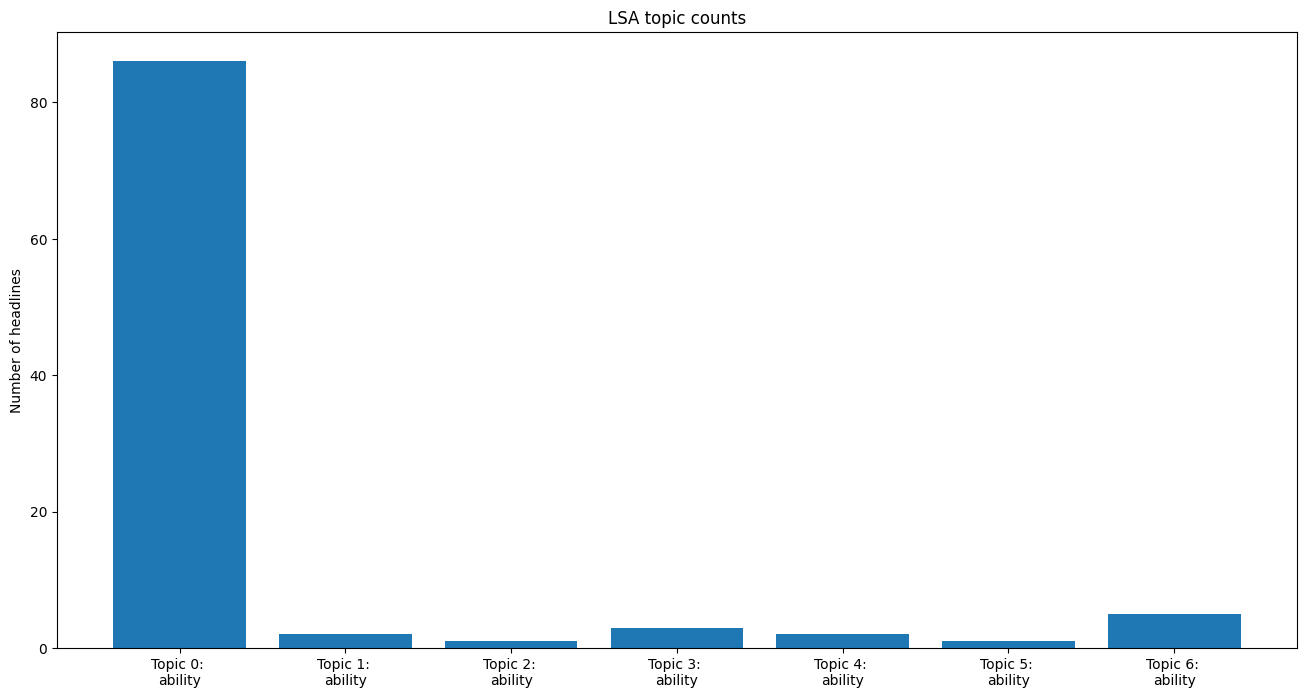

In [230]:
top_3_words = get_top_n_words(3, lsa_keys, small_document_term_matrix, small_count_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lsa_categories]

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lsa_categories, lsa_counts);
ax.set_xticks(lsa_categories);
ax.set_xticklabels(labels);
ax.set_ylabel('Number of headlines');
ax.set_title('LSA topic counts');
plt.show()

In [ ]:
plt.figure(figsize=(9,4))
sns.lineplot(y=date_df['number_of_tokens'], x=date_df['pub_date'], hue=pd.to_datetime(date_df['pub_date']).dt.year)
sns.lineplot(y=date_df['number_of_tokens'].rolling(360).mean(), x=date_df['pub_date'])
plt.title('Number of abstract tokens per day');

In [ ]:
plt.figure(figsize=(9,4))
sns.lineplot(y=date_df['unique_tokens'], x=date_df['pub_date'], hue=pd.to_datetime(date_df['pub_date']).dt.year)
sns.lineplot(y=date_df['unique_tokens'].rolling(360).mean(), x=date_df['pub_date'])
plt.title('Number of unique abstract tokens per day');

In [ ]:
# Plot the line graph representing lexical diversity over time
plt.figure(figsize=(9, 4))
sns.lineplot(y=date_df['unique_tokens'] / date_df['number_of_tokens'], 
             x=date_df['pub_date'], 
             hue=pd.to_datetime(date_df['pub_date']).dt.year)

# Plot a rolling mean of lexical diversity for smoothing
sns.lineplot(y=(date_df['unique_tokens'] / date_df['number_of_tokens']).rolling(360).mean(), 
             x=date_df['pub_date'])

# Set ylabel and title for the plot
plt.ylabel("Lexical diversity")
plt.title('Lexical diversity per day')

In [ ]:
# Create the scatter plot
plt.figure(figsize=(10, 6)) 
sns.scatterplot(x=date_df['number_of_papers'], 
                y=date_df['number_of_tokens'], 
                hue=pd.to_datetime(date_df['pub_date']).dt.year,
                palette='viridis')  

# Set plot title and labels
plt.title('Number of Papers vs. Number of Tokens Over Time')
plt.xlabel('Number of Papers')
plt.ylabel('Number of Tokens')
plt.legend(title='Year', loc='upper left')
plt.grid(True)  
plt.tight_layout()
plt.show()

In [ ]:
sns.boxplot(x=date_df['number_of_tokens'] / date_df['number_of_papers'],y=(pd.to_datetime(date_df['pub_date']).dt.year).astype('category'))


In [ ]:
sns.histplot(date_df['number_of_tokens'] / date_df['number_of_papers'])

### Creating Word Vectors

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

In [ ]:
start_time = time.time()
#### turn the text strings into token vectors
#### but only if a token appears in at least 500 documents 
count_text_vectorizer = CountVectorizer(min_df=500, ngram_range=(1,2))
count_text_vectors = count_text_vectorizer.fit_transform(date_df['cleaned_text'])

print(time.time()-start_time)

print(f"Shape: {count_text_vectors.shape}\n")
count_text_vectorizer.get_feature_names_out()

In [ ]:
date_df = pd.concat([date_df,pd.DataFrame(count_text_vectors.toarray(), columns=count_text_vectorizer.get_feature_names_out())],axis=1)

print(time.time()-start_time)

In [ ]:
date_df

In [ ]:
#plt.figure(figsize=(9,4))
#token_list = ['llm', 'recurrent', 'optimize', 'optimal', 'cnn', 'rnn', 'neighbor',
#             'architecture', 'lstm', 'transfer', 'transformer', 'quantum', 'learn', #'language',
#             'large', 'cpu', 'gpu', 'nvidia', 'intel', 'cryptocurrency','chatgpt', 'turing']
#for i in token_list:
#    sns.lineplot(x=date_df['pub_date'], y=(date_df[i] / date_df['number_of_papers']).rolling(360).mean() / date_df[i].max(), alpha=0.7)
##plt.title('Use of the word "neural"')
##plt.axhline(3, ls='--')
##plt.legend(token_list)

In [ ]:
def common_token_counter(clean_string):
    return [j for j,k in Counter(clean_string.split()).most_common(50)]

In [ ]:
top_tokens_list = Counter(" ".join([i for i in date_df['cleaned_text'].apply(common_token_counter).str.join(sep=' ')]).split())

print(f"Number of total tokens: {len(top_tokens_list)}")

In [ ]:
drop_list = ['pub_date','cleaned_text','number_of_papers','number_of_tokens','unique_tokens']
date_df.drop(columns=drop_list).sum().sort_values(ascending=False)[0:1000].index

In [ ]:
plt.figure(figsize=(12,9))
token_list = date_df.drop(columns=drop_list).sum().sort_values(ascending=False)[0:3000].index

for i in token_list:
    try:
#        sns.lineplot(x=date_df['pub_date'], y=(date_df[i] / date_df['number_of_papers']).rolling(360).mean()*100, alpha=0.3)
        sns.lineplot(x=date_df['pub_date'], y=(date_df[i] / date_df['number_of_papers'] / date_df[i].max()).rolling(360).mean().rolling(180).mean(), linewidth=0.3,)
    except:
        pass

In [ ]:
drop_list = ['pub_date','cleaned_text','number_of_papers','number_of_tokens','unique_tokens']


df_dict = {}
for col in date_df.drop(columns=drop_list).columns:
    df_dict[col] = (date_df[col] / date_df['number_of_papers']).rolling(360).mean().rolling(180).mean() / date_df[col].max()

moving_avg_df = pd.concat([date_df['pub_date'], pd.DataFrame(df_dict)], axis=1)[538:].reset_index(drop=True)
moving_avg_df = moving_avg_df.rename(columns={'pub_date': 'ds'})

In [ ]:
moving_avg_df

In [ ]:
#date_df.to_csv('lemmatized_date_df.csv', index=False)
#moving_avg_df.to_csv('lemmatized_moving_avg_df.csv', index=False)

In [ ]:
#https://stackoverflow.com/questions/45143450/how-to-fit-polynomial-to-a-time-series-data-in-python
plt.figure(figsize=(12,9))
x = [i for i in range(len(moving_avg_df))]

for word in moving_avg_df.drop(columns=['ds']).columns[:500]:
    y = moving_avg_df[word]
    
    curve = np.polyfit(x,y*1000, deg=7)
    #print(curve)
    p = np.poly1d( curve )
    sns.lineplot(x=x,y= p(x), alpha=0.3)

In [ ]:
plt.figure(figsize=(8,4))
x = [i for i in range(len(moving_avg_df))]

for word in ['llm', 'recurrent', 'optimize', 'optimal', 'cnn', 'rnn', 'neighbor',
#             'architecture', 'lstm', 'transfer', 'transformer', 'quantum', 'learn', #'language',
             ]:
    y = moving_avg_df[word]
    curve = np.polyfit(x,y, deg=7)
    #print(curve)
    p = np.poly1d( curve )
    plt.plot(x,y,p(x))

In [ ]:
plt.figure(figsize=(12,9))
x = [i for i in range(len(moving_avg_df))]
polynomial_dict = {}

for word in moving_avg_df.drop(columns=['ds']).columns:
    y = moving_avg_df[word]*1000
    polynomial_dict[word] = np.polyfit(x,y, deg=7)

In [ ]:
polynomial_df = pd.DataFrame(polynomial_dict).T.reset_index().rename(columns = {'index':'token', 0:'deg7', 1:'deg6', 2:'deg5', 3:'deg4',
                                                 4:'deg3', 5:'deg2', 6:'deg1', 7:'y_int'})

In [ ]:
sns.histplot(polynomial_df['y_int'])

In [ ]:
polynomial_df

In [ ]:
len(polynomial_df['positive_slope'])

### KNeighbors Clustering based on polynomial curves

In [ ]:
polynomial_df['positive_slope'] = polynomial_df['deg1'] > 0

In [ ]:
sns.pairplot(polynomial_df, hue='positive_slope')

### KMeans Clustering

In [ ]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, RobustScaler, QuantileTransformer, MaxAbsScaler, PowerTransformer, Normalizer

In [ ]:
X = polynomial_df.drop(columns=['token', 'positive_slope'])

sc = QuantileTransformer()
X_sc = sc.fit_transform(X)
pd.DataFrame(X_sc, columns = X.columns)

In [ ]:
1 / np.log(np.abs(X)) * np.sign(X)

In [ ]:
sns.pairplot(pd.concat([pd.DataFrame(X_sc, columns = X.columns), polynomial_df['positive_slope']], axis=1), hue='positive_slope')

In [ ]:
k_clusters = KMeans(n_clusters=7,)

k_clusters.fit(X_sc)

In [ ]:
k_clusters.labels_

In [ ]:
polynomial_df['cluster'] = k_clusters.labels_

In [ ]:
polynomial_df

In [ ]:
#plt.figure(figsize=(32,32))
sns.pairplot(polynomial_df.drop(columns=['token']), hue='cluster')
#plt.savefig("clustered_pairplot2.png")

In [ ]:
cluster_dict = {}
for i in range(len(neighbors_df)):
    cluster_dict[neighbors_df['unique_id'][i]] = neighbors_df['cluster'][i]

In [ ]:
#temp_df = polynomial_df[polynomial_df['cluster']==0][['deg7','deg6','deg5','deg4','deg3','deg2','deg1','y_int']].reset_index(drop=True)
plt.figure(figsize=(12,9))
x = [i for i in range(len(moving_avg_df))]

for word in polynomial_df[polynomial_df['cluster']==6]['token']:
    y = moving_avg_df[word]
    
    curve = np.polyfit(x,y*1000, deg=2)
    p = np.poly1d( curve )
    sns.lineplot(x=x,y= p(x), linewidth=0.1, color='black')


In [ ]:
integral_dict = {}

In [ ]:
%%time

#for token in moving_avg_df.drop(columns=['ds']).columns[7000:]:
#    integral_dict[token] = [sum(np.abs(moving_avg_df[token] - moving_avg_df[word])) for word in moving_avg_df.drop(columns=['ds']).columns]


In [ ]:
limited_df = moving_avg_df[:-392]

In [ ]:
%%time
#limited_integral_dict = {}
for token in moving_avg_df.drop(columns=['ds']).columns[8000:]:
    limited_integral_dict[token] = [sum(np.abs(limited_df[token] - limited_df[word])) for word in limited_df.drop(columns=['ds']).columns]


In [ ]:
pd.DataFrame(limited_integral_dict).to_csv('limited_integral_df.csv', index=False)

In [ ]:
%%time

#for token in moving_avg_df.drop(columns=['ds']).columns[0:10]:
#    limited_integral_dict[token] = [sum(np.abs(moving_avg_df[token] - moving_avg_df[word])) for word in moving_avg_df.drop(columns=['ds']).columns]


In [ ]:
#pd.DataFrame(integral_dict).to_csv('integral_dict.csv', index=False)

In [ ]:
#integral_df = pd.DataFrame(integral_dict)
limited_integral_df = pd.read_csv('limited_integral_df.csv')
integral_df = pd.read_csv('integral_dict.csv')
moving_avg_df = pd.read_csv('lemmatized_moving_avg_df.csv')

limited_integral_df

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
X = limited_integral_df

k_cluster_model = KMeans(n_clusters=50)
k_cluster_model.fit(X)

limited_integral_df['original_tokens'] = limited_integral_df.columns
limited_integral_df['k_cluster'] = k_cluster_model.labels_

In [ ]:
cluster_num = 35
#print([i for i in integral_df[integral_df['k_cluster']==cluster_num]['original_tokens']])
moving_avg_df[limited_integral_df[limited_integral_df['k_cluster']==cluster_num]['original_tokens']].plot.line(legend=False, linewidth=0.3)#, ylim=(0,.003))
moving_avg_df[limited_integral_df[limited_integral_df['k_cluster']==cluster_num]['original_tokens']].mean(axis=1).plot.line(color='blue', linestyle='-')#ylim=(0,.003))
plt.show()
print([i for i in limited_integral_df[limited_integral_df['k_cluster']==cluster_num]['original_tokens']])

In [ ]:
plt.figure(figsize=(12,8))
for i in range(0,50):
    moving_avg_df[limited_integral_df[limited_integral_df['k_cluster']==i]['original_tokens']].mean(axis=1).plot.line()

In [ ]:
#!pip install yellowbrick

In [ ]:
from yellowbrick.cluster import KElbowVisualizer, InterclusterDistance, SilhouetteVisualizer

In [ ]:
%%time
visualization = KElbowVisualizer(estimator=k_cluster_model,k=(2,20))

visualization.fit(X)

In [ ]:
visualization.show()

In [ ]:
intercluster_vis = InterclusterDistance(KMeans(25))
intercluster_vis.fit(X)

In [ ]:
silhouette_vis = SilhouetteVisualizer(KMeans(20))

silhouette_vis.fit(X)

In [ ]:
#integral_df.to_csv('integral_cluster_all_data.csv')
limited_integral_df.to_csv('integral_cluster_limited_data.csv')

In [ ]:
limited_integral_df['original_tokens'] =  limited_integral_df['original_tokens'].str.replace(' ','.')
limited_integral_df[['original_tokens','k_cluster']].to_csv('limited_integral_cluster_labels.csv', index=False)

In [ ]:
limited_integral_df['original_tokens']